In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [24]:
#Carregar dados do Excel e ignorar a primeira linha
df = pd.read_excel('vvp.xlsx', skiprows=1)

#Converter os dados em um formato adequado
data = df.values
data = data.reshape(-1)
data = pd.to_numeric(data, errors='coerce')
data = data[~np.isnan(data)]  # Remove valores nulos, se houver

#Remover tendência linear
def detrend(y):
    x = np.arange(len(y))
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return y - (m * x + c)

data_detrended = detrend(data)
print(df)
print(data_detrended)



   Unnamed: 0        112  118    132    129    121  135  148  148.1  136  ...   
0         NaN        NaN  NaN    NaN    NaN    NaN  NaN  NaN    NaN  NaN  ...  \
1         NaN        NaN  NaN    NaN    NaN    NaN  NaN  NaN    NaN  NaN  ...   
2         NaN        NaN  NaN    NaN    NaN    NaN  NaN  NaN    NaN  NaN  ...   
3         NaN     VVP(k)    T  115.0  126.0  141.0  NaN  NaN    NaN  NaN  ...   
4         NaN        NaN  NaN    NaN    NaN    NaN  NaN  NaN    NaN  NaN  ...   
5         NaN        NaN  NaN    NaN    NaN    NaN  NaN  NaN    NaN  NaN  ...   
6         NaN        NaN  NaN    NaN    NaN    NaN  NaN  NaN    NaN  NaN  ...   
7         NaN   VVP(k-1)   P1  118.0  115.0  126.0  NaN  NaN    NaN  NaN  ...   
8         NaN  VVP(k-12)   P2  112.0  118.0  132.0  NaN  NaN    NaN  NaN  ...   

   362  348.1  363  435  491  505  404.1  359  310  337  
0  NaN    NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  
1  NaN    NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  
2  NaN    NaN  

Mean Squared Error: 0.6052149117795438


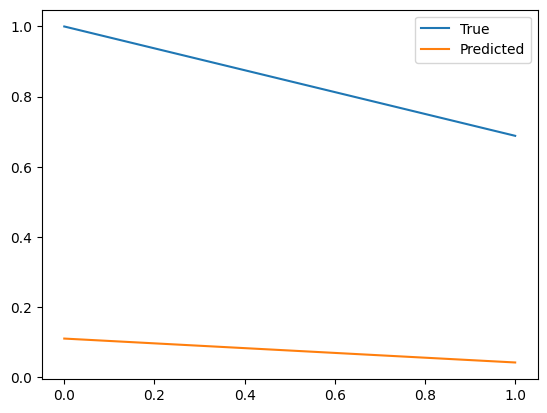

In [25]:
#Dividir os dados em VVP, VVP(k-1) e VVP(k-12)
VVP = data_detrended[3:]
VVP_k_1 = data_detrended[2:-1]
VVP_k_12 = data_detrended[:-3]

#Preparar os dados para a previsão
X = np.column_stack((VVP_k_1, VVP_k_12))
y = VVP

#Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

#Treinar e testar o modelo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

#Inicializar o modelo
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=0)

#Treinar o modelo
model.fit(X_train, y_train)

#Fazer previsões
y_pred = model.predict(X_test)

#Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#Visualizar resultados
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
